In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="muted", font_scale=1.1)
custom_palette = [
    "#D9ED92",  # verde claro amarelado
    "#B5E48C",  # verde claro
    "#99D98C",  # verde médio
    "#76C893",  # verde esverdeado
    "#52B69A",  # verde-água
    "#34A0A4",  # verde-azulado
    "#168AAD",  # azul esverdeado
    "#1A759F",  # azul médio
    "#1E6091",  # azul escuro
    "#184E77"   # azul bem escuro
]
plt.style.use("dark_background")
# exam_palette = ["#FFFF00", "#99D98C", "#1A759F"]

Importando base de dados 

In [25]:
df_enem = pd.read_csv("databases/ENEM_2023_FINAL.csv")
display(df_enem)

,TP_SEXO,TP_COR_RACA,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,ESCOLARIDADE_PAI,ESCOLARIDADE_MAE,INTERNET_CASA,EST_IDADE,EST_RENDA_PER_CAP,EST_CELULAR_PER_CAP,EST_COMP_PER_CAP,EST_VEICULO_PER_CAP,EST_ELE_DOM_PER_CAP
0,M,3,4.0,510.1,483.8,484.5,492.3,520.0,D,E,B,19.0,2310.002500,2.250,1.000,0.500000,4.750000
1,F,1,2.0,583.3,474.1,564.6,599.3,660.0,D,F,B,18.0,1188.001000,0.900,0.400,0.000000,1.800000
2,M,1,4.0,646.5,620.7,801.6,585.7,740.0,G,G,B,18.0,2475.001250,0.750,1.125,0.250000,1.500000
3,F,1,4.0,553.4,495.1,605.8,554.6,880.0,F,F,B,17.0,2475.001250,1.125,0.500,0.250000,2.625000
4,F,1,4.0,616.3,589.7,682.8,636.7,860.0,F,F,B,18.0,3300.001667,1.000,1.000,0.000000,1.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M,1,4.0,609.1,613.6,725.2,570.7,800.0,G,G,B,17.0,4950.000833,0.750,0.750,0.333333,1.500000
9996,F,3,2.0,471.6,488.4,597.6,556.4,820.0,C,C,B,18.0,742.501250,1.125,0.500,0.250000,1.750000
9997,F,1,4.0,579.6,616.6,674.5,627.2,580.0,E,E,B,18.0,1155.001250,1.125,1.125,0.500000,2.375000
9998,F,1,4.0,609.2,595.5,625.0,611.3,620.0,A,G,B,17.0,3135.001250,1.125,0.750,0.750000,3.125000


Boxplot das notas

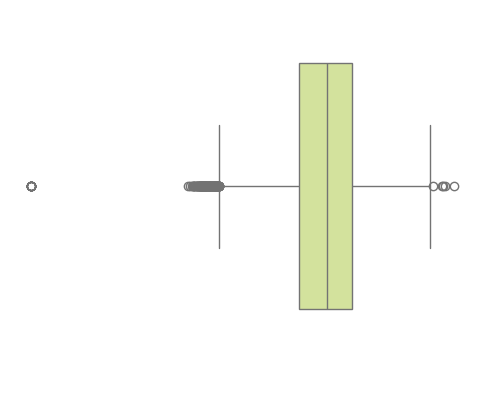

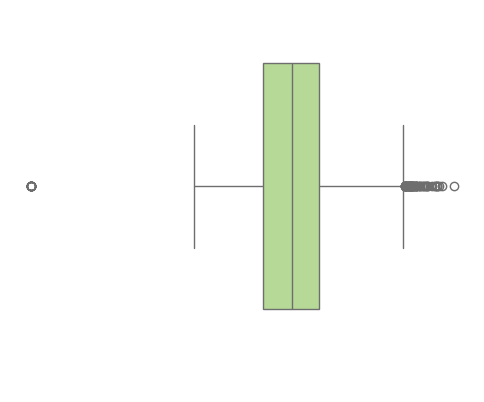

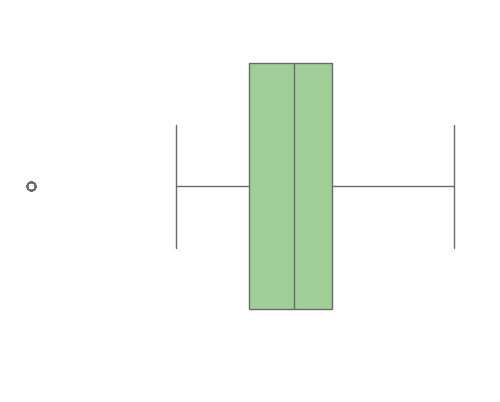

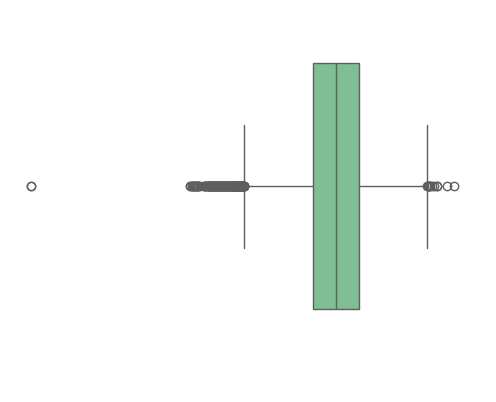

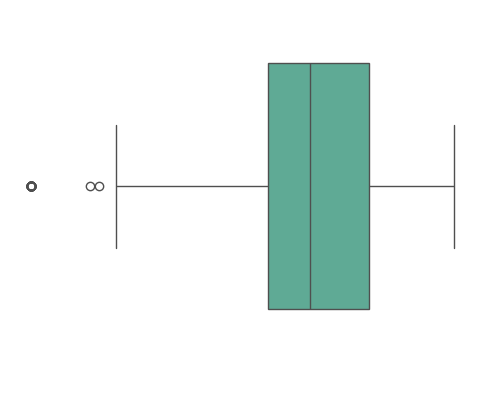

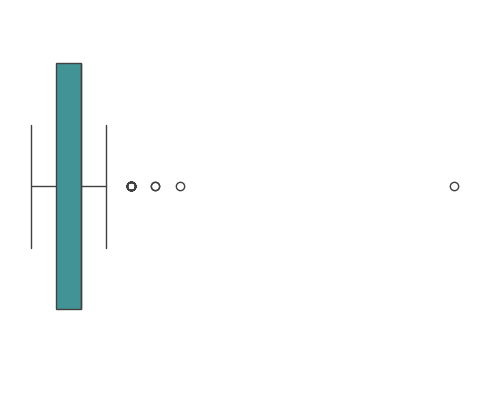

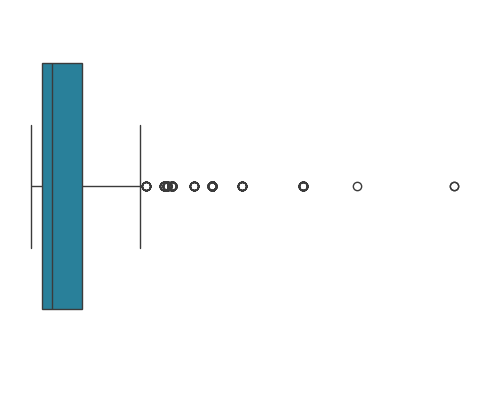

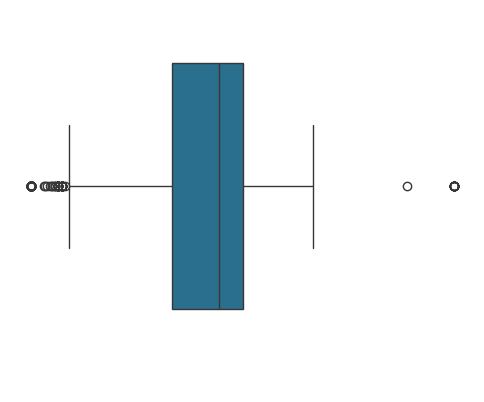

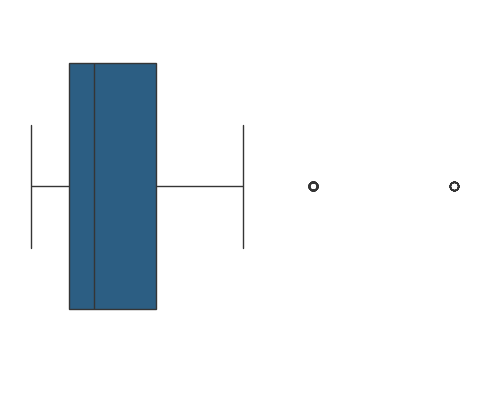

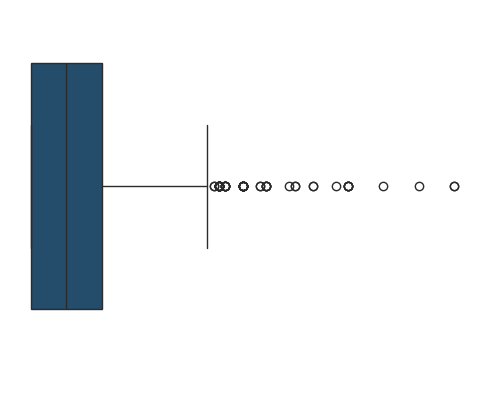

In [30]:
grade_cols = ["NU_NOTA_CH", "NU_NOTA_CN", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO", "EST_IDADE", "EST_RENDA_PER_CAP", "EST_CELULAR_PER_CAP","EST_COMP_PER_CAP", "EST_VEICULO_PER_CAP", "EST_ELE_DOM_PER_CAP"]

def plot_single_boxplots(df: pd.DataFrame, cols: list, colors: list):
    for col, color in zip(cols, colors):
        plt.figure(figsize=(6,4))
        sns.boxplot(x=df[col], color=color)   # só uma nota por vez
        plt.title(f"Distribuição da nota: {col}")
        plt.xlabel("Nota")

        #Tornar fundo transparente
        plt.gca().set_facecolor("none")  # Fundo do gráfico
        plt.gcf().patch.set_alpha(0)      # Fundo da figura

        # Salvar com transparência
        plt.savefig("grafico_transparente.png", transparent=True, dpi=300)
        plt.show()

# Chamada
plot_single_boxplots(df_enem, grade_cols, custom_palette)